In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np

In [26]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=24)

In [5]:
 X

array([[ 6.06849678, -6.63025733],
       [ 1.86288593, -0.71285851],
       [-7.8519719 , -5.72591111],
       ...,
       [-7.45445325, -7.76751655],
       [ 8.54196931, -8.4564797 ],
       [ 7.09198862, -8.18922724]])

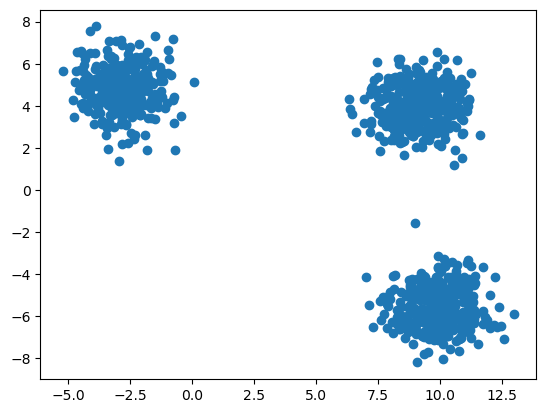

In [27]:
plt.scatter(X[:,0],X[:,1])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [28]:
from sklearn.cluster import KMeans

In [29]:
 ## Elbow method to select K

In [37]:
wcss=[]
for k in range(1,20):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [38]:
wcss

[17470.00283946867,
 4295.751978797078,
 1214.6193789885363,
 1039.2089921209545,
 905.8880665754486,
 763.9703532583039,
 672.4469036251706,
 586.1610745968367,
 511.869183749366,
 462.19370736051707,
 425.1316086437001,
 389.3587634941294,
 367.0582437107525,
 343.7018910512945,
 324.2170238777265,
 300.9844955341352,
 283.46831296501637,
 273.3111882090115,
 260.49164052073877]

In [32]:
# elbow curve

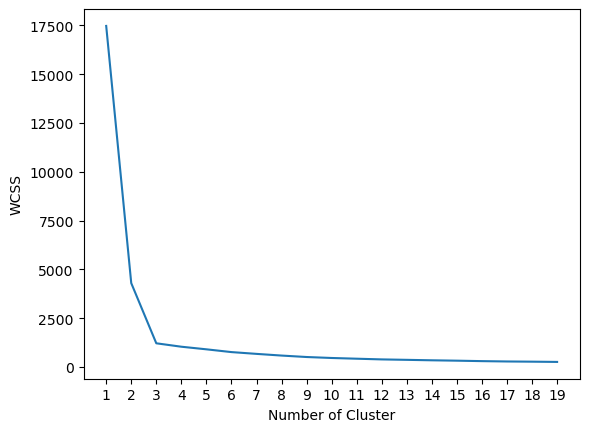

In [39]:
plt.plot(range(1,20),wcss)
plt.xticks(range(1,20))
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [40]:
# at 3 we can find like a elbow

kmeans=KMeans(n_clusters=3,init='k-means++')

In [43]:
y_labels=kmeans.fit_predict(X_train)

C:\Users\shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


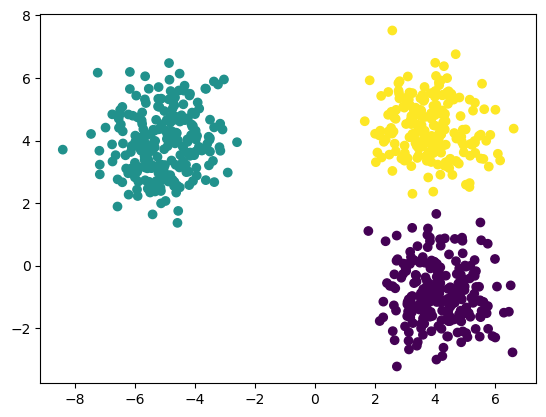

In [45]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [46]:
# Instead finding elbow manually
## Use knee locator

In [47]:
!pip install kneed

In [48]:
from kneed import KneeLocator

In [51]:
k1=KneeLocator(range(1,20),wcss,curve='convex',direction='decreasing')  # Convex is the shape of wcss curve,decreasing means wcss is decreasing

In [52]:
k1.elbow

3

In [54]:
# Sillhoute score
from sklearn.metrics import silhouette_score

In [56]:
sc=[]
for k in range(2,20):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    sc.append(score)

C:\Users\shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [57]:
sc

[0.6943757755861163,
 0.7260426986158387,
 0.5757448044759105,
 0.45264944459819917,
 0.3424852789574872,
 0.3429668102710424,
 0.3457540597682064,
 0.35619469092653455,
 0.35170681329346565,
 0.34808352518225194,
 0.35013693049605465,
 0.34776262522166207,
 0.3439559523409531,
 0.3458400278297686,
 0.34692675672409634,
 0.3415784415846671,
 0.3513307097334452,
 0.3484414713150916]